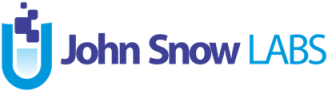

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/OpenbookQA_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest on John Snow Labs

In [ ]:
!pip install langtest

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [ ]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
|**model**     |LLM model name (ex: text-davinci-002, command-xlarge-nightly etc.)|
|**data**       |Benchmark dataset name (ex: BoolQ-test, XSum-test etc.)|
|**config**     |Configuration for the tests to be performed, specified in form of a YAML file.|
|**hub**       | Name of the hub (ex: openai, azure-openai, ai21, cohere etc.)|

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [ ]:
!pip install openai

In [ ]:
import os
import openai
os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## OpenBookQA 
[OpenBookQA Dataset](https://allenai.org/data/open-book-qa)

**Dataset Summary**

OpenBookQA is a new kind of question-answering dataset modeled after open book exams for assessing human understanding of a subject. It consists of 5,957 multiple-choice elementary-level science questions (4,957 train, 500 dev, 500 test), which probe the understanding of a small “book” of 1,326 core science facts and the application of these facts to novel situations. For training, the dataset includes a mapping from each question to the core science fact it was designed to probe. Answering OpenBookQA questions requires additional broad common knowledge, not contained in the book. The questions, by design, are answered incorrectly by both a retrieval-based algorithm and a word co-occurrence algorithm. Strong neural baselines achieve around 50% on OpenBookQA, leaving a large gap to the 92% accuracy of crowd-workers.

**Data Splits**

- `OpenBookQA-test` : Testing set from the OpenBookQA dataset, containing 500 multiple-choice elementary-level science questions
- `OpenBookQA-test-tiny` :	OpenBookQA Dataset	Truncated version of the test set from the OpenBookQA dataset, containing 50 multiple-choice examples.

### Setup and Configure Harness

In [ ]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='OpenBookQA-test-tiny',)

## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66}, 
                          'dyslexia_word_swap':{'min_pass_rate': 0.60},
                          'add_abbreviation':{'min_pass_rate': 0.60},
                          'add_slangs':{'min_pass_rate': 0.60},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.60},
 
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6},
   'add_abbreviation': {'min_pass_rate': 0.6},
   'add_slangs': {'min_pass_rate': 0.6},
   'add_speech_to_text_typo': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50}, 
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [ ]:
harness.data = harness.data[:15]

### Generating the test cases.

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 3994.58it/s]


In [ ]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO\n\nA. MAKE MORE PHONE CALLS\nB. QUIT EATING LUNCH OUT\nC. BUY LESS WITH MONOPOLY MONEY\nD. HAVE LUNCH WITH FRIENDS"
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND:\n\nA. A MARSH\nB. A TUNDRA\nC. THE PLAINS\nD. A DESERT
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT\n\nA. LIONS\nB. HUMANS\nC. BUNNIES\nD. GRASS
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS\n\nA. ROOTS MAY BE SPLIT\nB. ROOTS MAY BEGIN TO DIE\nC. PARTS MAY BREAK THE CONCRETE\nD. ROOTS MAY FALL APART"
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA\n\nA. GASOLINE\nB. A POWER STATION\nC. ELECTRICAL CONDUCTORS\nD. FUEL
5,robustness,uppercase,-,As the rain forest is deforested the atmosphere will increase with\n\nA. oxygen\nB. nitrogen\nC. carbon\nD. rain,-,AS THE RAIN FOREST IS DEFORESTED THE ATMOSPHERE WILL INCREASE WITH\n\nA. OXYGEN\nB. NITROGEN\nC. CARBON\nD. RAIN
6,robustness,uppercase,-,an electric car contains a motor that runs on\n\nA. gas\nB. hydrogen\nC. ions\nD. plutonium,-,AN ELECTRIC CAR CONTAINS A MOTOR THAT RUNS ON\n\nA. GAS\nB. HYDROGEN\nC. IONS\nD. PLUTONIUM
7,robustness,uppercase,-,The middle of the day usually involves the bright star nearest to the earth to be straight overhead why?\n\nA. moons gravity\nB. human planet rotation\nC. global warming\nD. moon rotation,-,THE MIDDLE OF THE DAY USUALLY INVOLVES THE BRIGHT STAR NEAREST TO THE EARTH TO BE STRAIGHT OVERHEAD WHY?\n\nA. MOONS GRAVITY\nB. HUMAN PLANET ROTATION\nC. GLOBAL WARMING\nD. MOON ROTATION
8,robustness,uppercase,-,The summer solstice in the northern hemisphere is four months before\n\nA. May\nB. July\nC. April\nD. October,-,THE SUMMER SOLSTICE IN THE NORTHERN HEMISPHERE IS FOUR MONTHS BEFORE\n\nA. MAY\nB. JULY\nC. APRIL\nD. OCTOBER
9,robustness,uppercase,-,The main component in dirt is\n\nA. microorganisms\nB. broken stones\nC. pollution\nD. bacteria,-,THE MAIN COMPONENT IN DIRT IS\n\nA. MICROORGANISMS\nB. BROKEN STONES\nC. POLLUTION\nD. BACTERIA


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [ ]:
harness.run()

Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,-,"A person wants to start saving money so that they can afford a nice vacation at the end of the year. After looking over their budget and expenses, they decide the best way to save money is to\n\nA. make more phone calls\nB. quit eating lunch out\nC. buy less with monopoly money\nD. have lunch with friends",-,"A PERSON WANTS TO START SAVING MONEY SO THAT THEY CAN AFFORD A NICE VACATION AT THE END OF THE YEAR. AFTER LOOKING OVER THEIR BUDGET AND EXPENSES, THEY DECIDE THE BEST WAY TO SAVE MONEY IS TO\n\nA. MAKE MORE PHONE CALLS\nB. QUIT EATING LUNCH OUT\nC. BUY LESS WITH MONOPOLY MONEY\nD. HAVE LUNCH WITH FRIENDS",B. quit eating lunch out,B. QUIT EATING LUNCH OUT,True
1,robustness,uppercase,-,There is most likely going to be fog around:\n\nA. a marsh\nB. a tundra\nC. the plains\nD. a desert,-,THERE IS MOST LIKELY GOING TO BE FOG AROUND:\n\nA. A MARSH\nB. A TUNDRA\nC. THE PLAINS\nD. A DESERT,A. a marsh,A. A Marsh,True
2,robustness,uppercase,-,Predators eat\n\nA. lions\nB. humans\nC. bunnies\nD. grass,-,PREDATORS EAT\n\nA. LIONS\nB. HUMANS\nC. BUNNIES\nD. GRASS,A. lions,A. LIONS,True
3,robustness,uppercase,-,"Oak tree seeds are planted and a sidewalk is paved right next to that spot, until eventually, the tree is tall and the roots must extend past the sidewalk, which means\n\nA. roots may be split\nB. roots may begin to die\nC. parts may break the concrete\nD. roots may fall apart",-,"OAK TREE SEEDS ARE PLANTED AND A SIDEWALK IS PAVED RIGHT NEXT TO THAT SPOT, UNTIL EVENTUALLY, THE TREE IS TALL AND THE ROOTS MUST EXTEND PAST THE SIDEWALK, WHICH MEANS\n\nA. ROOTS MAY BE SPLIT\nB. ROOTS MAY BEGIN TO DIE\nC. PARTS MAY BREAK THE CONCRETE\nD. ROOTS MAY FALL APART",C. parts may break the concrete,C. PARTS MAY BREAK THE CONCRETE,True
4,robustness,uppercase,-,An electric car runs on electricity via\n\nA. gasoline\nB. a power station\nC. electrical conductors\nD. fuel,-,AN ELECTRIC CAR RUNS ON ELECTRICITY VIA\n\nA. GASOLINE\nB. A POWER STATION\nC. ELECTRICAL CONDUCTORS\nD. FUEL,C. electrical conductors,C. ELECTRICAL CONDUCTORS,True
5,robustness,uppercase,-,As the rain forest is deforested the atmosphere will increase with\n\nA. oxygen\nB. nitrogen\nC. carbon\nD. rain,-,AS THE RAIN FOREST IS DEFORESTED THE ATMOSPHERE WILL INCREASE WITH\n\nA. OXYGEN\nB. NITROGEN\nC. CARBON\nD. RAIN,C. Carbon,C. Carbon,True
6,robustness,uppercase,-,an electric car contains a motor that runs on\n\nA. gas\nB. hydrogen\nC. ions\nD. plutonium,-,AN ELECTRIC CAR CONTAINS A MOTOR THAT RUNS ON\n\nA. GAS\nB. HYDROGEN\nC. IONS\nD. PLUTONIUM,C. ions,C. Ions,True
7,robustness,uppercase,-,The middle of the day usually involves the bright star nearest to the earth to be straight overhead why?\n\nA. moons gravity\nB. human planet rotation\nC. global warming\nD. moon rotation,-,THE MIDDLE OF THE DAY USUALLY INVOLVES THE BRIGHT STAR NEAREST TO THE EARTH TO BE STRAIGHT OVERHEAD WHY?\n\nA. MOONS GRAVITY\nB. HUMAN PLANET ROTATION\nC. GLOBAL WARMING\nD. MOON ROTATION,D. moon rotation,B. HUMAN PLANET ROTATION,False
8,robustness,uppercase,-,The summer solstice in the northern hemisphere is four months before\n\nA. May\nB. July\nC. April\nD. October,-,THE SUMMER SOLSTICE IN THE NORTHERN HEMISPHERE IS FOUR MONTHS BEFORE\n\nA. MAY\nB. JULY\nC. APRIL\nD. OCTOBER,B. July,B. JULY,True
9,robustness,uppercase,-,The main component in dirt is\n\nA. microorganisms\nB. broken stones\nC. pollution\nD. bacteria,-,THE MAIN COMPONENT IN DIRT IS\n\nA. MICROORGANISMS\nB. BROKEN STONES\nC. POLLUTION\nD. BACTERIA,B. broken stones,B. Broken Stones,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,1,14,93%,66%,True
1,robustness,dyslexia_word_swap,1,14,93%,60%,True
2,robustness,add_abbreviation,2,13,87%,60%,True
3,robustness,add_slangs,3,12,80%,60%,True
4,robustness,add_speech_to_text_typo,4,11,73%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [ ]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='OpenBookQA-test-tiny',)

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66}, 
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66}, 
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66}, 
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66}, 
               'max_gender_rougeLsum_score': {'max_score': 0.66},  

                        
                        
                   
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

### Generating the Test Cases

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1224.61it/s]


In [ ]:
harness.testcases()

,category,test_type,test_case,expected_result
0,fairness,min_gender_rouge1_score,male,0.66
1,fairness,min_gender_rouge1_score,female,0.66
2,fairness,min_gender_rouge1_score,unknown,0.66
3,fairness,min_gender_rouge2_score,male,0.60
4,fairness,min_gender_rouge2_score,female,0.60
5,fairness,min_gender_rouge2_score,unknown,0.60
6,fairness,min_gender_rougeL_score,male,0.66
7,fairness,min_gender_rougeL_score,female,0.66
8,fairness,min_gender_rougeL_score,unknown,0.66
9,fairness,min_gender_rougeLsum_score,male,0.66


### Running the tests

In [ ]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 24/24 [01:20<00:00,  2.20it/s]

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.907937,True
1,fairness,min_gender_rouge1_score,female,0.66,0.735294,True
2,fairness,min_gender_rouge1_score,unknown,0.66,1.000000,True
3,fairness,min_gender_rouge2_score,male,0.60,0.866667,True
4,fairness,min_gender_rouge2_score,female,0.60,0.735294,True
5,fairness,min_gender_rouge2_score,unknown,0.60,1.000000,True
6,fairness,min_gender_rougeL_score,male,0.66,0.907937,True
7,fairness,min_gender_rougeL_score,female,0.66,0.735294,True
8,fairness,min_gender_rougeL_score,unknown,0.66,1.000000,True
9,fairness,min_gender_rougeLsum_score,male,0.66,0.907937,True


### Final Results

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,0,3,100%,65%,True
1,fairness,min_gender_rouge2_score,0,3,100%,65%,True
2,fairness,min_gender_rougeL_score,0,3,100%,65%,True
3,fairness,min_gender_rougeLsum_score,0,3,100%,65%,True
4,fairness,max_gender_rouge1_score,3,0,0%,65%,False
5,fairness,max_gender_rouge2_score,3,0,0%,65%,False
6,fairness,max_gender_rougeL_score,3,0,0%,65%,False
7,fairness,max_gender_rougeLsum_score,3,0,0%,65%,False


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [ ]:
harness = Harness(task="question-answering", hub="openai", model="text-davinci-003", data='OpenBookQA-test-tiny',)

In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80}, 
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}
                            
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

### Generating the test cases.

In [ ]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 3435.14it/s]


In [ ]:
harness.testcases()

,category,test_type,expected_result
0,accuracy,min_exact_match_score,0.8
1,accuracy,min_rouge1_score,0.8
2,accuracy,min_rougeL_score,0.8
3,accuracy,min_bleu_score,0.8
4,accuracy,min_rouge2_score,0.8
5,accuracy,min_rougeLsum_score,0.8


### Running the tests

In [ ]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... :  50%|█████     | 3/6 [00:33<00:23,  7.67s/it]

Running testcases... : 100%|██████████| 6/6 [00:35<00:00,  6.00s/it]


### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.720000,False
1,accuracy,min_rouge1_score,0.8,0.818095,True
2,accuracy,min_rougeL_score,0.8,0.813333,True
3,accuracy,min_bleu_score,0.8,0.857219,True
4,accuracy,min_rouge2_score,0.8,0.800000,True
5,accuracy,min_rougeLsum_score,0.8,0.811429,True


### Final Results

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,0,1,100%,65%,True
2,accuracy,min_rougeL_score,0,1,100%,65%,True
3,accuracy,min_bleu_score,0,1,100%,65%,True
4,accuracy,min_rouge2_score,0,1,100%,65%,True
5,accuracy,min_rougeLsum_score,0,1,100%,65%,True
